<a href="https://colab.research.google.com/github/nirbhik-datta/CrimesInCommunities/blob/master/Crimes_in_Communities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Crimes in Communities**





Given statistical data about a region, predict the number of crime occurances per 100,000 people.

In [0]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

Pandas Tutorial:
DataFrame : Similar to Relational Database Table
Series : Single Column

DataFrame consists of one or more series each with associated series name.



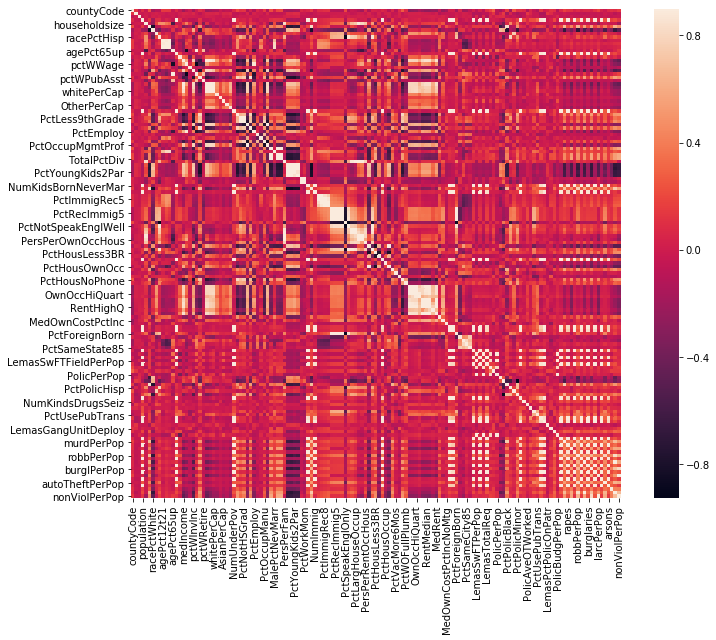

In [0]:
#Read Crimes in Communities Dataset
communities_crime_dataset = pd.read_csv("https://raw.githubusercontent.com/nirbhik-datta/myprojects/master/CommViolPredUnnormalizedData.txt", header = 0, sep=",", na_values=['?'])

#Rationale for Principle Component Regression
corr = communities_crime_dataset.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corr, vmax=0.9, square=True)

In [0]:
#List of features we are going to predict
target_cols = ['murdPerPop', 'rapesPerPop', 'robbPerPop','assaultPerPop','burglPerPop', 'larcPerPop', 'autoTheftPerPop', 'arsonsPerPop']

In [0]:
#Remove empty values, columns providing information not of use
communities_crime_dataset = communities_crime_dataset.dropna(0, subset=target_cols)
communities_crime_dataset.drop(columns=['state','countyCode','communityCode','fold'],inplace=True)
communities_crime_dataset.dropna(thresh = 450, axis = 1, inplace = True) #Remove columns with significant missing values

In [0]:
#Split data into features and target features
names = np.array(communities_crime_dataset['communityName'])
features = communities_crime_dataset.columns[1:-18]

data = np.array(communities_crime_dataset[list(features)+target_cols],dtype=np.float32)

#data imputation for rows with missing values
from fancyimpute import KNN
data = KNN(k=3).fit_transform(data)

X=data[:, :-8]
Y=data[:,-8:]

#Sanity Check
assert not np.isnan(X).any()
assert not np.isnan(Y).any()
assert np.isfinite(X).all()
assert np.isfinite(Y).all()

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
Using TensorFlow backend.


Imputing row 1/1902 with 0 missing, elapsed time: 1.401
Imputing row 101/1902 with 0 missing, elapsed time: 1.402
Imputing row 201/1902 with 0 missing, elapsed time: 1.402
Imputing row 301/1902 with 0 missing, elapsed time: 1.403
Imputing row 401/1902 with 0 missing, elapsed time: 1.403
Imputing row 501/1902 with 0 missing, elapsed time: 1.403
Imputing row 601/1902 with 0 missing, elapsed time: 1.404
Imputing row 701/1902 with 0 missing, elapsed time: 1.404
Imputing row 801/1902 with 0 missing, elapsed time: 1.405
Imputing row 901/1902 with 0 missing, elapsed time: 1.405
Imputing row 1001/1902 with 0 missing, elapsed time: 1.405
Imputing row 1101/1902 with 0 missing, elapsed time: 1.406
Imputing row 1201/1902 with 0 missing, elapsed time: 1.407
Imputing row 1301/1902 with 0 missing, elapsed time: 1.407
Imputing row 1401/1902 with 0 missing, elapsed time: 1.407
Imputing row 1501/1902 with 0 missing, elapsed time: 1.408
Imputing row 1601/1902 with 0 missing, elapsed time: 1.408
Imputing 

In [0]:
communities_crime_dataset[list(features)+target_cols]

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr,...,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,OwnOccQrange,RentLowQ,RentMedian,RentHighQ,RentQrange,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,murdPerPop,rapesPerPop,robbPerPop,assaultPerPop,burglPerPop,larcPerPop,autoTheftPerPop,arsonsPerPop
0,11980,3.10,1.37,91.78,6.50,1.88,12.47,21.44,10.93,11.33,11980,100.00,75122,89.24,1.55,70.20,23.62,1.03,18.39,79584,29711,30233,13600,5725,27101,5115.0,22838,227,1.96,5.81,9.90,48.18,2.70,64.55,14.65,28.82,5.49,50.73,3.67,26.38,...,3,64,98.37,91.01,3.12,37.50,1959,0.00,0.28,215900,262600,326900,111000,685,1001,1001,316,1001,23.8,21.1,14.0,11,0,10.66,53.72,65.29,78.09,89.14,6.5,1845.9,9.63,0.0,0.00,0.00,8.20,32.81,114.85,1132.08,131.26,16.41
1,23123,2.82,0.80,95.57,3.44,0.85,11.01,21.30,10.48,17.18,23123,100.00,47917,78.99,1.11,64.11,35.50,2.75,22.85,55323,20148,20191,18137,0,20074,5250.0,12222,885,3.98,5.61,13.72,29.89,2.43,61.96,12.26,29.28,6.39,37.64,4.23,27.99,...,3,240,97.15,84.88,0.00,18.33,1958,0.31,0.14,136300,164200,199900,63600,467,560,672,205,627,27.6,20.7,12.5,0,0,8.30,77.17,71.27,90.22,96.12,10.6,2186.7,3.84,0.0,0.00,4.25,21.26,102.05,242.37,1598.78,110.55,4.25
2,29344,2.43,0.74,94.33,3.43,2.35,11.36,25.88,11.01,10.28,29344,100.00,35669,82.00,1.15,55.73,22.25,2.94,14.56,42112,16946,17103,16644,21606,15528,5954.0,8405,1389,4.75,2.80,9.09,30.13,4.01,69.80,15.95,21.52,8.79,32.48,10.10,25.78,...,3,544,95.68,57.79,0.92,7.54,1976,1.55,0.12,74700,90400,112000,37300,370,428,520,150,484,24.1,21.7,11.6,16,0,5.00,44.77,36.60,61.26,82.85,10.6,2780.9,4.37,0.0,8.30,16.60,154.95,38.74,758.14,4972.19,376.30,60.87
5,140494,2.45,2.51,95.65,0.90,0.95,18.09,32.89,20.04,13.26,140494,100.00,21577,75.78,1.00,41.15,29.31,7.12,14.09,27705,11878,12029,7382,10264,10753,7192.0,8104,23223,17.78,8.76,23.03,20.66,5.72,59.02,14.31,26.83,14.72,23.42,11.40,33.32,...,2,5119,91.81,55.50,2.09,26.22,1966,6.13,0.31,37700,53900,73100,35400,215,280,349,134,340,26.4,17.3,11.7,327,4,1.49,64.35,42.29,70.61,85.66,70.4,1995.7,0.97,0.0,4.63,50.98,90.05,297.29,1386.46,5091.64,300.60,88.72
6,28700,2.60,1.60,96.57,1.47,1.10,11.17,27.41,12.76,14.42,28700,100.00,42805,79.47,0.39,47.70,30.23,5.41,17.23,50394,18193,18276,17342,21482,12639,21852.0,22594,1126,4.01,4.49,13.89,27.01,4.85,65.42,14.02,27.17,8.50,32.78,5.97,36.05,...,3,566,95.11,56.96,1.41,34.45,1956,0.69,0.28,155100,179000,215500,60400,463,669,824,361,736,24.4,20.8,12.5,0,0,9.19,77.30,63.45,82.23,93.53,10.9,2643.5,9.62,0.0,0.00,13.53,30.44,182.66,372.09,974.19,487.10,57.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,56216,3.07,6.87,61.68,15.23,29.86,15.46,30.16,14.34,8.08,56216,100.00,24727,75.05,1.12,31.42,21.45,19.98,14.41,27388,10237,13041,8344,8590,3399,6470.0,6644,13804,25.06,17.12,30.87,15.79,9.99,55.53,13.47,27.18,16.38,25.02,10.22,31.91,...,2,683,96.40,44.63,1.46,13.18,1973,4.91,0.55,71200,91100,118900,47700,298,374,455,157,438,29.8,22.6,11.7,64,0,18.90,52.67,39.19,74.58,85.88,16.7,3365.4,0.59,0.0,16.4

In [0]:
print('X', X.shape)
print('Y', Y.shape)

X (1902, 102)
Y (1902, 8)


In [0]:
from sklearn.utils import shuffle

#Shuffle values
X,Y,names = shuffle(X,Y,names,random_state = 14)

In [0]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer


def transform_x(x):
  scaler = StandardScaler()
  scaler.fit(x)
  x = scaler.transform(x);
  
  scaler = RobustScaler()
  x = scaler.fit_transform(x)
  pt = PowerTransformer()
  x = pt.fit_transform(x)
  pca = PCA() #HOW MANY FEATURES SHOULD BE REMOVED
  x = pca.fit_transform(x)
  print(pca.explained_variance_)
  return x

def transform_y(y):
  scaler = StandardScaler()
  scaler.fit(y)
  def untransform(yy):
    return (yy * scaler.scale_) + scaler.mean_
  y = scaler.transform(y)
  return y, untransform

X = transform_x(X)
Y, untransform_y = transform_y(Y)

assert not np.isnan(X).any()
assert np.isfinite(X).all()

[2.8093206e+01 1.8756598e+01 9.1549911e+00 6.9561095e+00 4.3467407e+00
 3.8749466e+00 3.3473222e+00 2.4399879e+00 2.0187917e+00 1.7217119e+00
 1.4645014e+00 1.4309120e+00 1.2941715e+00 9.7224188e-01 9.3328476e-01
 8.3456916e-01 8.2604748e-01 7.6159650e-01 6.6190690e-01 6.4792913e-01
 6.1553013e-01 5.6414509e-01 5.5410504e-01 5.1469797e-01 4.9363625e-01
 4.7335550e-01 4.6820831e-01 4.5046756e-01 4.1258785e-01 4.0268597e-01
 3.9074755e-01 3.7922293e-01 3.5475203e-01 3.3638352e-01 3.1136259e-01
 2.8600600e-01 2.6954833e-01 2.5347540e-01 2.3977140e-01 2.2742255e-01
 2.1436007e-01 2.0943585e-01 1.9741403e-01 1.8620054e-01 1.8392153e-01
 1.7013894e-01 1.5755275e-01 1.4376910e-01 1.3654730e-01 1.3082281e-01
 1.1228905e-01 1.0673536e-01 9.7429954e-02 9.1306873e-02 8.8044874e-02
 8.3883084e-02 8.0533430e-02 7.7100888e-02 6.9506630e-02 6.7878760e-02
 6.6406630e-02 6.5655805e-02 5.7255678e-02 5.5118203e-02 5.0702389e-02
 4.8890982e-02 4.2781811e-02 4.0705472e-02 3.9351881e-02 3.8079675e-02
 3.550

In [0]:
# Split data into training and test
X_train, X_test, Y_train, Y_test = X[221:], X[:221], Y[221:], Y[:221]

print(X_test.shape)
print(Y_test.shape)
print(X_train.shape)
print(Y_train.shape)

(221, 102)
(221, 8)
(1681, 102)
(1681, 8)


In [0]:
from tensorflow import keras
from tensorflow.keras import layers
import keras.backend as K
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras.regularizers import l1, l2, l1_l2

def huber_loss(y_true, y_pred):
        return tf.losses.huber_loss(y_true,y_pred,delta=.5)

def smape(y_true, y_pred):
    """Computes the symmetric mean absolute percentage error"""
    yt = untransform_y(y_true)
    yp = untransform_y(y_pred)
    return K.mean(K.abs(yt - yp) / (K.abs(yt) + K.abs(yp) + K.epsilon()))


def smape_single(y_true, y_pred):
    """Computes the sMAPE for every output feature"""
    yt = untransform_y(y_true)
    yp = untransform_y(y_pred)
    return np.mean(np.abs(yt - yp) / (np.abs(yt) + np.abs(yp) + K.epsilon()), axis=0)

def mrs(y_true, y_pred):
    """Computes the mean R-squared (goodness-of-fit) across all outputs"""
    yt = untransform_y(y_true)
    ybar = K.mean(yt, axis=0)
    ss_tot = K.sum(K.square(yt - ybar), axis=0)
    ss_res = K.sum(K.square(yt - untransform_y(y_pred)), axis=0)
    rsq = 1 - (ss_res / (ss_tot + K.epsilon()))
    return K.mean(rsq)

def stdrs(y_true, y_pred):
    """Computes the standard deviation of R-squared (goodness-of-fit) across all outputs"""
    yt = untransform_y(y_true)
    ybar = K.mean(yt, axis=0)
    ss_tot = K.sum(K.square(yt - ybar), axis=0)
    ss_res = K.sum(K.square(yt - untransform_y(y_pred)), axis=0)
    rsq = 1 - (ss_res / (ss_tot + K.epsilon()))
    return K.std(rsq)

def regression_model(reg = None):
  keras.backend.clear_session() 
  inputs = keras.Input(shape=(102,))
  x = layers.Dense(25, activation='relu', input_shape=(102,),  kernel_initializer='glorot_uniform', kernel_regularizer=reg)(inputs)
  x = layers.Dense(25, activation='relu', input_shape=(25,), kernel_initializer='glorot_uniform', kernel_regularizer=reg)(x)
  outputs = layers.Dense(8, input_shape=(25,), activation='linear')(x)

  model = keras.Model(inputs=inputs, outputs=outputs)
  model.compile(optimizer=keras.optimizers.Adam(lr=0.0001), loss='logcosh', metrics=[mrs, stdrs, smape]) #logcosh
  model.summary()
  return model

In [0]:
model = regression_model(l2(5e-3))
history = model.fit(X_train, Y_train, batch_size=32, epochs=1000, verbose=False)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 102)]             0         
_________________________________________________________________
dense (Dense)                (None, 25)                2575      
_________________________________________________________________
dense_1 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 208       
Total params: 3,433
Trainable params: 3,433
Non-trainable params: 0
_________________________________________________________________


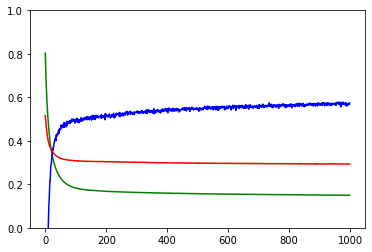

In [0]:
plt.ylim((0, 1))
plt.plot(history.history['loss'], 'g-')
plt.plot(history.history['mrs'], 'b-')
plt.plot(history.history['smape'], 'r-')
plt.show()

In [0]:
print(model.evaluate(X_train, Y_train, verbose=False))
print(model.evaluate(X_test, Y_test, verbose=False))

[0.14924207935192838, 0.5740758, 0.18182822, 0.29289573]
[0.19381193466046276, 0.50493306, 0.18370946, 0.29096046]


In [0]:
print('Pred', *(int(i) for i in untransform_y(model.predict(X_test[0:1])[0])), sep='\t')
print('Real', *(int(i) for i in untransform_y(Y_test[0])), sep='\t')

Pred	17	79	451	836	2113	5772	848	56
Real	35	107	681	1264	2422	6650	756	69


In [0]:
def r2(y_true, y_pred):
    """Computes the R-squared (goodness-of-fit) across all output features"""
    yt = untransform_y(y_true)
    ybar = np.mean(yt, axis=0)
    ss_tot = np.sum(np.square(yt - ybar), axis=0)
    ss_res = np.sum(np.square(yt - untransform_y(y_pred)), axis=0)
    return 1 - (ss_res / ss_tot)

def smape_single(y_true, y_pred):
    """Computes the R-squared (goodness-of-fit) across all output features"""
    yt = untransform_y(y_true)
    yp = untransform_y(y_pred)
    return np.mean(np.abs(yt - yp) / (np.abs(yt) + np.abs(yp) + K.epsilon()), axis=0)

yy = model.predict(X_test)
print('STATISTIC\tR^2\tsMAPE')
print('---------\t---\t-----')
for label, r, p in zip(target_cols, r2(Y_test, yy), smape_single(Y_test, yy)):
    print(label, '{:5.3f}'.format(r), '{:5.3f}'.format(p), sep='\t')
print('\nMEAN\t\t{:5.3f}\t{:5.3f}'.format(np.mean(r2(Y_test, yy)), np.mean(smape_single(Y_test, yy))))

STATISTIC	R^2	sMAPE
---------	---	-----
murdPerPop	0.584	0.572
rapesPerPop	0.423	0.302
robbPerPop	0.762	0.271
assaultPerPop	0.502	0.282
burglPerPop	0.654	0.153
larcPerPop	0.468	0.140
autoTheftPerPop	0.628	0.218
arsonsPerPop	0.260	0.381

MEAN		0.535	0.290


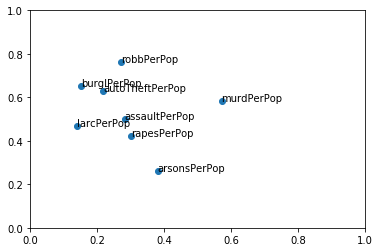

In [0]:
p = smape_single(Y_test, yy)
r = r2(Y_test, yy)

plt.ylim((0, 1))
plt.xlim((0, 1))
plt.scatter(p, r)
for i, txt in enumerate(target_cols):
    plt.annotate(txt, (p[i], r[i]))
plt.show()